# **Financial Risk Management - Fraud Detection**
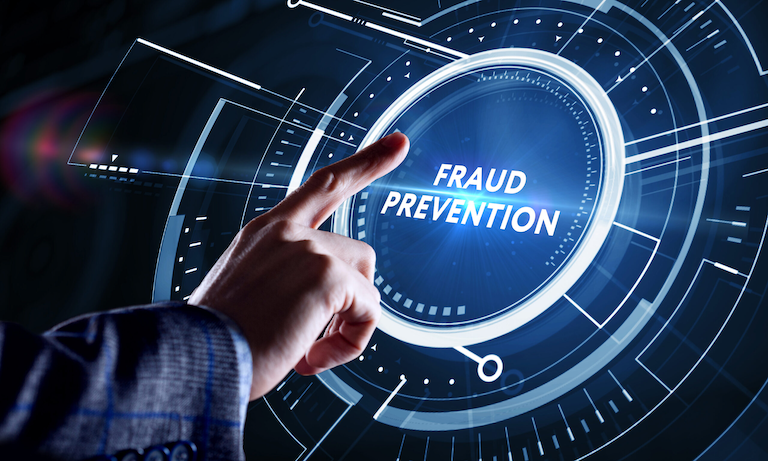

# **Project Overview**

**Data Source:** [Kaggle - Credit Card Fraud Data](https://www.kaggle.com/datasets/neharoychoudhury/credit-card-fraud-data/data)

**AI Branches:** Machine Learning (ML), Deep Learning (DL), and Natural Language Processing (NLP)

**Models:**
*   Random Forest Classifier (RFC)
*   K-Means Clustering
*   Long Short-Term Memory Network (LSTM)
*   spaCy's built-in "en_core_web_sm" model

**Data Analytics Methods:**
*   Binary Classification (RFC): Predicting a binary outcome (fraudulent or not).
*   Clustering (K-Means): Grouping transactions based on similarities in selected features ('amt', 'transaction_hour').
*   Time Series Forecasting (LSTM): Predicting future values in a time series (daily fraud counts).
*   Natural Language Processing (NLP) with spaCy: Text processing for merchant name standardization and analysis.
*   Exploratory Data Analysis (EDA):  Visualizations and statistical analysis to understand data patterns.


## **1. Business Problem Statement**

Credit card fraud poses significant financial risks to institutions and individuals. Fraudulent transactions cause losses, increase operational costs, and damage trust. Traditional rule-based systems struggle with evolving fraud and high false positives. This project aims to develop a robust, adaptive, and accurate fraud detection system using ML, DL, and NLP to identify fraudulent transactions in real-time, minimize false positives, and protect stakeholders. The NLP component specifically addresses the challenge of inconsistent merchant names, improving the accuracy of merchant-based risk analysis.

## **2. Project Objectives**

Addressing the limitations of traditional rule-based systems, this project develops a robust, adaptive, and accurate fraud detection system leveraging machine learning (ML), deep learning (DL), and natural language processing (NLP). By analyzing a public credit card transaction dataset, the project aims to achieve:

 **high-precision fraud detection**

 **Identify distinct transaction groups** with varying levels of fraud risk using clustering.

 **forecasts future fraud trends** for proactive risk management decision-making

 **enhances merchant-based risk assessment**

 Furthermore, **key factors** related fraudulent activity to identify

 and creat **interactive tool and Chatbot** to enable users to input transaction details to receive real-time fraud probability predictions and find out risk merchants quickly via Chatbot

## **3. Project Importance**

**Financial Loss Mitigation:** Reduce financial losses due to fraud.

**Enhanced Customer Trust:** Build trust through proactive fraud prevention.

**Operational Efficiency:** Automate fraud detection, improving efficiency and reducing manual review.

**Regulatory Compliance:** Meet regulatory requirements for fraud prevention.

**Adaptive Security:** ML models can adapt to evolving fraud patterns.

**Proactive Risk Management:** Forecasting enables proactive risk mitigation.

**Merchant Risk Profiling:** NLP identifies high-risk merchants, allowing for targeted interventions and improved risk management.

## **4. Project Procedures**

1.  **Data Loading and Preprocessing**

2.  **Exploratory Data Analysis (EDA)**

3.  **Model Development**

3.  **Model Evaluation**

4.  **Documentation, Visualization and Reporting**

## **5. Data Field Description**

The dataset contains information on credit card transactions, with a label indicating whether each transaction is fraudulent (`is_fraud`):

*   **trans_date_trans_time:** Transaction date and time (datetime).
*   **merchant:** Merchant name (string). Processed using NLP for standardization.
*   **category:** Merchant category (string).
*   **amt:** Transaction amount (float).
*   **city:** Cardholder's city (string).
*   **state:** Cardholder's state (string).
*   **lat:** Cardholder's latitude (float).
*   **long:** Cardholder's longitude (float).
*   **city_pop:** Cardholder's city population (integer).
*   **job:** Cardholder's occupation (string).
*   **dob:** Cardholder's date of birth (datetime).
*   **trans_num:** Unique transaction identifier (string).
*   **merch_lat:** Merchant's latitude (float).
*   **merch_long:** Merchant's longitude (float).
*   **is_fraud:** Fraud indicator (1 for fraudulent, 0 for not fraudulent) (integer).

## Importing Libraries and Loading Dataset

In [ ]:
!pip install keras-tuner
!pip install gradio

# --- 0. Import Libraries ---

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Data manipulation and analysis
import pandas as pd
import numpy as np
import re

# Machine learning and preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (silhouette_score, davies_bouldin_score,
                             classification_report, confusion_matrix,
                             roc_auc_score, roc_curve, precision_recall_curve,
                             accuracy_score, mean_squared_error,
                             mean_absolute_error, r2_score)
from imblearn.over_sampling import SMOTE

# Deep learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import keras_tuner as kt

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.patches as patches
from plotly.subplots import make_subplots

# Interactive widgets
import ipywidgets as widgets
from IPython.display import display, clear_output

# Natural language processing
import spacy
from spacy.matcher import PhraseMatcher

# Chatbot interface
import gradio as gr

# --- 1. Data Loading and Initial Exploration ---

# Load the data
df = pd.read_csv("fraud_data.csv")

# Display initial information
print("DataFrame Head:\n", df.head(), "\n")
print("DataFrame Info:")
df.info()
print("\nDataFrame Description:\n", df.describe(), "\n")

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0], "\n")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.5 MB/s eta 0:00:00
DataFrame Head:
   trans_date_trans_time                          merchant        category  \
0      04-01-2019 00:58  "Stokes, Christiansen and Sipes"     grocery_net   
1      04-01-2019 15:06                      Predovic Inc    shopping_net   
2      04-01-2019 22:37                   Wisozk and Sons        misc_pos   
3      04-01-2019 23:06                    Murray-Smitham     grocery_pos   
4      04-01-2019 23:59                      

## Data Preprossing

In [ ]:
# --- 2. Data Cleaning and Feature Engineering ---

# Define functions for cleaning and parsing
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^a-z\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
    return text

def parse_trans_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%d-%m-%Y %H:%M')
    except ValueError:
        return pd.NaT

def parse_dob(dob_str):
    try:
        return pd.to_datetime(dob_str, format='%d-%m-%Y')
    except ValueError:
        return pd.NaT

# Apply cleaning and parsing
df['merchant'] = df['merchant'].apply(clean_text)
df['job'] = df['job'].apply(clean_text)
df['category'] = df['category'].apply(clean_text)
df['trans_date_trans_time'] = df['trans_date_trans_time'].apply(parse_trans_date)
df['dob'] = df['dob'].apply(parse_dob)

# Create new features
df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year
df['transaction_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_date'] = pd.to_datetime(df['trans_date_trans_time'].dt.date)

# Handle 'is_fraud' column
df['is_fraud'] = pd.to_numeric(df['is_fraud'].astype(str).str.replace('"', '').str.strip(), errors='coerce')
df = df[df['is_fraud'].isin([0, 1])]
df['is_fraud'] = df['is_fraud'].astype(int)

# Display updated info
print("Updated DataFrame:")
print("\nUpdated DataFrame Info:")
df.info()
print("\nUpdated DataFrame Description:")
print(df.describe(), "\n")

print("Categories:", df['category'].unique())
print("Jobs:", df['job'].unique())
print("Merchants:", df['merchant'].unique())

print(f"No. of Fraud Transaction is: {df['is_fraud'].value_counts()[1]}")
print(f"No. of Not Fraud Transaction is: {df['is_fraud'].value_counts()[0]}")

print("\nUpdated DataFrame Head:")
print(df.head(), "\n")

# Check for missing values again
missing_values_updated = df.isnull().sum()
print("Updated Missing Values:")
print(missing_values_updated[missing_values_updated > 0], "\n")

# Missing Value Handling
df.dropna(inplace=True)
print("Missing Values After Dropping Rows:")
print(df.isnull().sum(), "\n")

Updated DataFrame:

Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 14444 entries, 0 to 14445
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  14444 non-null  datetime64[ns]
 1   merchant               14444 non-null  object        
 2   category               14444 non-null  object        
 3   amt                    14444 non-null  float64       
 4   city                   14444 non-null  object        
 5   state                  14444 non-null  object        
 6   lat                    14444 non-null  float64       
 7   long                   14444 non-null  float64       
 8   city_pop               14444 non-null  int64         
 9   job                    14444 non-null  object        
 10  dob                    14444 non-null  datetime64[ns]
 11  trans_num              14444 non-null  object        
 12  merch_lat            

## Exploratory Data Analysis (EDA) Visualizations

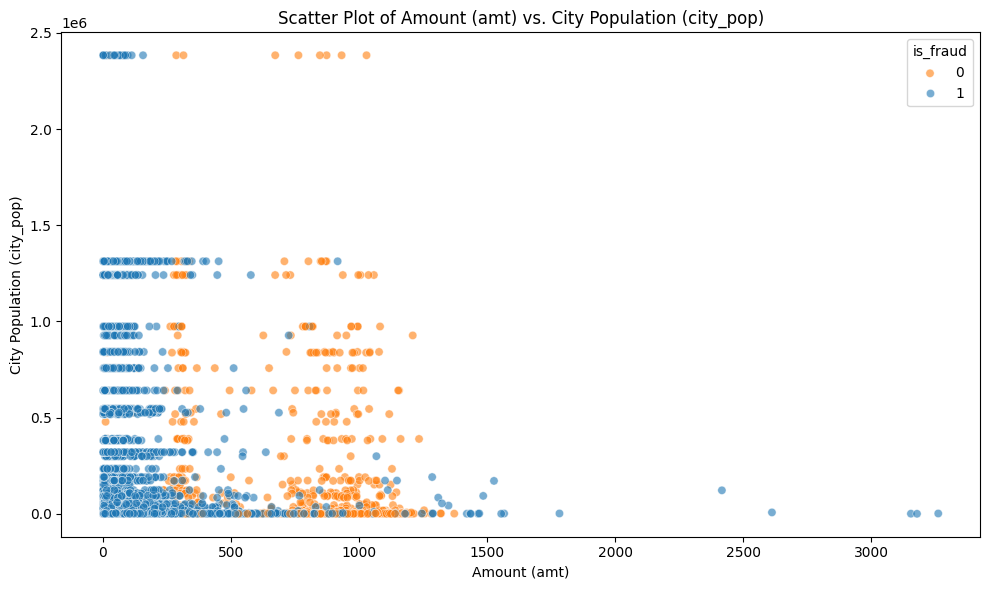

In [ ]:
# --- 3. Exploratory Data Analysis (EDA) Visualizations ---

#Create a copy for EDA & visualizations
df_eda = df.copy()

# Fraud proportion by city (Map)
city_fraud_counts = df_eda.groupby('city')['is_fraud'].agg(['count', 'sum']).reset_index()
city_fraud_counts['fraud_proportion'] = (city_fraud_counts['sum'] / city_fraud_counts['count']) * 100

city_lat_long = df_eda[['city', 'lat', 'long']].drop_duplicates()
city_fraud_counts = city_fraud_counts.merge(city_lat_long, on='city')

fig = px.scatter_mapbox(
    city_fraud_counts,
    lat='lat',
    lon='long',
    size='fraud_proportion',
    color='fraud_proportion',
    color_continuous_scale=px.colors.sequential.Plasma,
    hover_name='city',
    size_max=30,
    title='Fraud Proportion Density by City',
)

fig.update_layout(mapbox_style="open-street-map", mapbox_zoom=3, mapbox_center={"lat": df_eda['lat'].mean(), "lon": df_eda['long'].mean()})
fig.show()

# Visualize fraud by Age and Transaction Hour
def plot_fraud_by(df_eda, category, title, x_title, y2_title):
    fraud_df = df_eda[df_eda['is_fraud'] == 1]

    total_counts = df_eda[category].value_counts().sort_index()
    fraud_counts = fraud_df[category].value_counts().sort_index()
    fraud_proportion = (fraud_counts / total_counts).fillna(0) * 100

    fig = make_subplots(specs=[[{"secondary_y": True}]])
    colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink']

    for val in fraud_df[category].unique():
        color = colors[val // 10 if category == 'age' else val] if (val // 10 if category == 'age' else val) < len(colors) else 'black'
        fig.add_trace(go.Scatter(
            x=fraud_df[fraud_df[category] == val][category],
            y=fraud_df[fraud_df[category] == val]['trans_date_trans_time'],
            mode='markers',
            marker=dict(color=color, opacity=0.6),
            name=f'{category} {val}',
            showlegend=False
        ), secondary_y=False)

    fig.add_trace(go.Scatter(
        x=fraud_proportion.index,
        y=fraud_proportion.values,
        mode='lines+markers',
        name='Fraud Proportion (%)',
        line=dict(color='green'),
        marker=dict(symbol='circle')
    ), secondary_y=True)

    fig.update_layout(
        title=title,
        xaxis_title=x_title,
        yaxis_title='Transaction Date',
        yaxis2_title=y2_title,
        title_font_size=20,
        legend=dict(x=0, y=1, traceorder='normal', bgcolor='rgba(255, 255, 255, 0.5)')
    )
    fig.update_yaxes(title_text='Transaction Date', secondary_y=False)
    fig.update_yaxes(title_text=y2_title, secondary_y=True, range=[0, 100])

    fig.show()

plot_fraud_by(df_eda.copy(), 'age', 'Fraud Transaction by Age', 'Age', 'Fraud Proportion (%)')
plot_fraud_by(df_eda.copy(), 'transaction_hour', 'Fraud Transaction by Hour', 'Transaction Hour', 'Fraud Proportion (%)')

# Visualize fraud by Job and Category
def plot_fraud_bar(df_eda, category, title, x_title, y2_title):
    fraud_df = df_eda[df_eda['is_fraud'] == 1]

    total_counts = df_eda[category].value_counts()
    fraud_counts = fraud_df[category].value_counts()
    fraud_proportion = (fraud_counts / total_counts).fillna(0) * 100

    fig = make_subplots(specs=[[{"secondary_y": True}]])

    fig.add_trace(go.Bar(
        x=fraud_proportion.index.astype(str),
        y=fraud_proportion.values,
        name='Fraud Proportion (%)',
        marker_color='green',
        opacity=0.7
    ), secondary_y=True)

    fig.add_trace(go.Scatter(
        x=total_counts.index.astype(str),
        y=total_counts.values,
        mode='markers',
        name='Total Count',
        marker=dict(color='orange', opacity=0.6
        )
    ), secondary_y=False)

    fig.update_layout(
        title=title,
        xaxis_title=x_title,
        yaxis_title='Total Count',
        yaxis2_title=y2_title,
        title_font_size=20,
        legend=dict(x=0, y=1, traceorder='normal', bgcolor='rgba(255, 255, 255, 0.5)')
    )
    fig.update_yaxes(title_text='Total Count', secondary_y=False)
    fig.update_yaxes(title_text=y2_title, secondary_y=True, range=[0, 100])

    fig.show()

plot_fraud_bar(df_eda.copy(), 'job', 'Fraud Proportion by Job', 'Job', 'Fraud Proportion (%)')
plot_fraud_bar(df_eda.copy(), 'category', 'Fraud Proportion by Category', 'Category', 'Fraud Proportion (%)')

# Visualize Amount vs. City Population
num_cols = df_eda.select_dtypes(include=[np.number]).columns
cat_cols = df_eda.select_dtypes(include=['object']).columns
for col in cat_cols:
    df_eda[col].fillna(df_eda[col].mode()[0], inplace=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_eda, x='amt', y='city_pop', hue='is_fraud', alpha=0.6)
plt.title('Scatter Plot of Amount (amt) vs. City Population (city_pop)')
plt.xlabel('Amount (amt)')
plt.ylabel('City Population (city_pop)')
plt.legend(title='is_fraud', labels=['0', '1'])
plt.tight_layout()
plt.show()

## Random Forest Classification for Fraud Detection

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

--- Detailed Random Forest Evaluation ---

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2520
           1       0.85      0.94      0.89       369

    accuracy                           0.97      2889
   macro avg       0.92      0.96      0.94      2889
weighted avg       0.97      0.97      0.97      2889


Confusion Matrix:


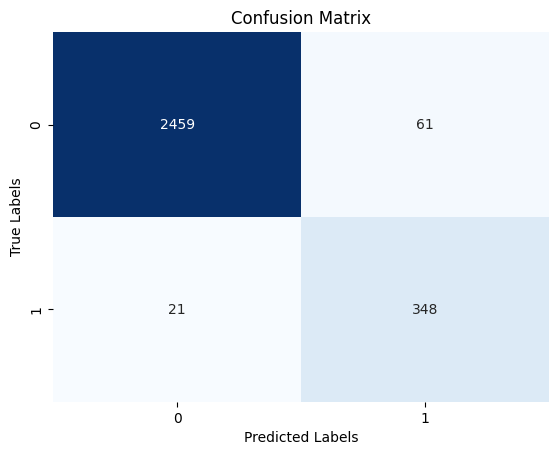


ROC AUC: 0.9909


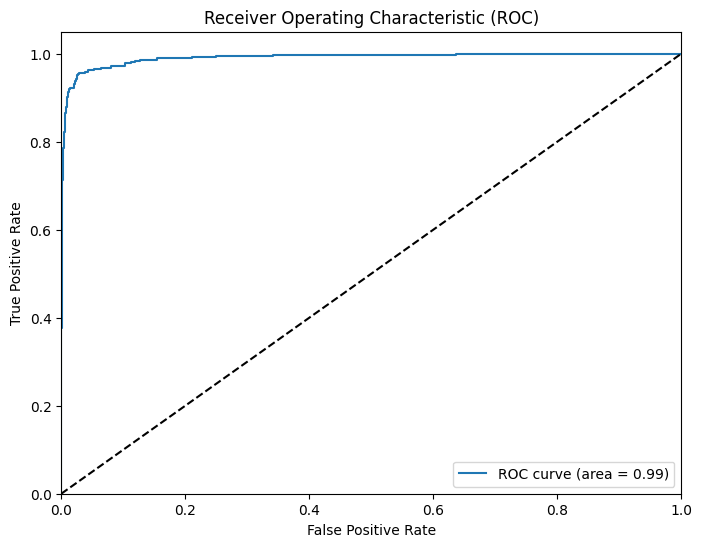

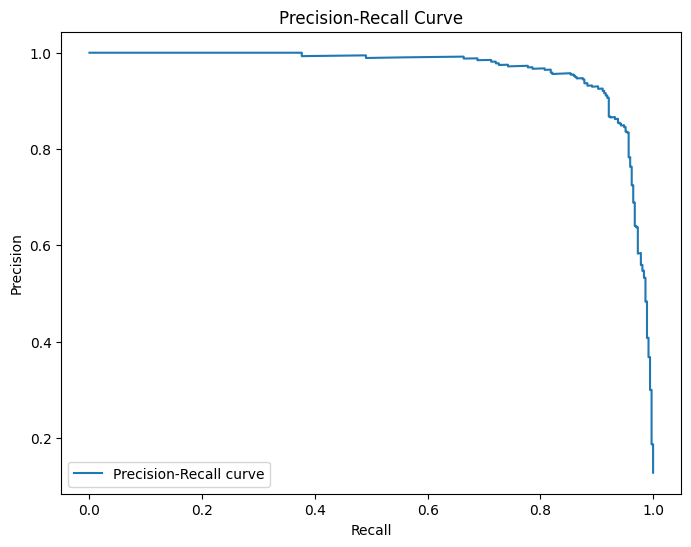


Random Forest Metrics (Summary):
               Accuracy  Precision    Recall  F1-Score   ROC AUC
Random Forest  0.971616   0.973564  0.971616  0.972233  0.990938


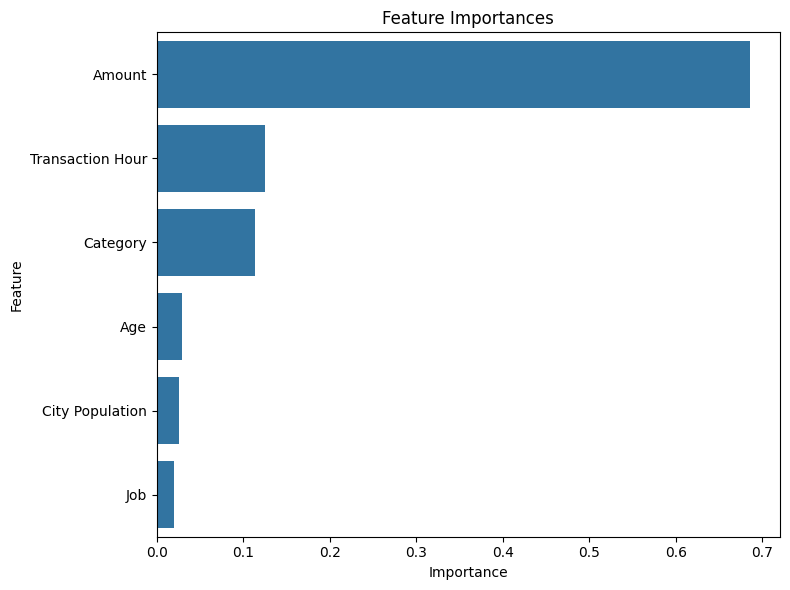

,Sample,Category,Amount,City Population,Job,Age,Transaction Hour,Prediction,Probability of Fraud
0,Sample 1,11,122.000000,1302,38,43,0,0,0.008395
1,Sample 2,0,500.000000,100000,1,45,18,1,0.873829
2,Sample 3,1,300.000000,750,1,30,7,1,0.783206


In [ ]:
# --- 4. Random Forest Classification ---

#Create a copy for RF
df_model = df.copy()

# Feature Engineering, Encoding, and Data Splitting

# Define Features and Target
features = ['category', 'amt', 'city_pop', 'job', 'age', 'transaction_hour']
# 'city' is not included because it is a a high-cardinality categorical, which would lead to a significant increase in feature dimensionality, risking model overfitting and computational inefficiency, However, 'city_pop'  considered to capture geographic information in a less sensitive way
target = 'is_fraud'

# Define Feature Datatypes
feature_dtypes = {'category': 'str', 'job': 'str', 'amt': 'float64', 'city_pop': 'int64', 'age': 'int64', 'transaction_hour': 'int64'}
for feature, dtype in feature_dtypes.items():
    df_model[feature] = df_model[feature].astype(dtype)

# Encode categorical variables (Label Encoding)
categorical_columns = ['category', 'job']
label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    # Fit LabelEncoder on the ENTIRE dataset
    label_encoders[col].fit(df_model[col])
    df_model[col] = label_encoders[col].transform(df_model[col])


# Split Data & Handle Imbalance
X = df_model[features]
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

# Handle Imbalance (SMOTE)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Model Training and Evaluation (Random Forest)

# Define Parameter Grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Random Forest Model & GridSearchCV
rf = RandomForestClassifier(random_state=7)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get Best Estimator and Parameters
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Make Predictions
y_pred_rf = best_rf.predict(X_test)
y_pred_prob_rf = best_rf.predict_proba(X_test)[:, 1]

# Expanded Evaluation Section
print("\n--- Detailed Random Forest Evaluation ---")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# ROC-AUC and ROC Curve
roc_auc = roc_auc_score(y_test, y_pred_prob_rf)
print(f"\nROC AUC: {roc_auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob_rf)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Metrics Summary
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
metrics_rf = {'Accuracy': accuracy_score(y_test, y_pred_rf),
              'Precision': report_rf['weighted avg']['precision'],
              'Recall': report_rf['weighted avg']['recall'],
              'F1-Score': report_rf['weighted avg']['f1-score'],
              'ROC AUC': roc_auc}
metrics_rf_df = pd.DataFrame(metrics_rf, index=['Random Forest'])
print("\nRandom Forest Metrics (Summary):")
print(metrics_rf_df)

# Feature Importance Visualization ---

# Feature Importance
feature_importances = best_rf.feature_importances_
display_names = {'amt': 'Amount', 'transaction_hour': 'Transaction Hour',
                   'category': 'Category', 'age': 'Age',
                   'city_pop': 'City Population', 'job': 'Job'}

# Sort feature importances
indices = np.argsort(feature_importances)[::-1]
sorted_feature_names = [display_names.get(features[i], features[i]) for i in indices]
sorted_importances = feature_importances[indices]

# Plot Feature Importances
plt.figure(figsize=(8, 6))
sns.barplot(x=sorted_importances, y=sorted_feature_names, orient='h')
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Sample Use Case for Random Forest

# Sample Data
sample_data = pd.DataFrame({'category': [11, 0, 1], 'amt': [122.00, 500.00, 300.00],
                            'city_pop': [1302, 100000, 750], 'job': [38, 1, 1],
                            'age': [43, 45, 30], 'transaction_hour': [0, 18, 7]})

# Make Predictions on Sample Data
y_pred_prob_rf = best_rf.predict_proba(sample_data)[:, 1]

results_rf_df = pd.DataFrame({'Sample': [f'Sample {i + 1}' for i in range(len(y_pred_prob_rf))],
                              'Category': sample_data['category'],
                              'Amount': sample_data['amt'],
                              'City Population': sample_data['city_pop'],
                              'Job': sample_data['job'],
                              'Age': sample_data['age'],
                              'Transaction Hour': sample_data['transaction_hour'],
                              'Prediction': best_rf.predict(sample_data),
                              'Probability of Fraud': y_pred_prob_rf})

# Highlight Probabilities
def highlight_prob(val):
    if val < 0.3: return 'background-color: green; color: white'
    if val < 0.6: return 'background-color: yellow; color: black'
    return 'background-color: red; color: white'

styled_rf_df = results_rf_df.style.applymap(highlight_prob, subset=['Probability of Fraud']).set_table_attributes('style="border: 1px solid black; border-collapse: collapse;"')
display(styled_rf_df)

# Interactive Widget

# Get original unique values
original_unique_categories = df['category'].unique().tolist()
original_unique_jobs = df['job'].unique().tolist()

# Create input widgets
category_dropdown = widgets.Dropdown(options=original_unique_categories, description='Category:')
amount_text = widgets.Text(description='Amount:')
city_pop_text = widgets.Text(description='City_Pop:')
job_dropdown = widgets.Dropdown(options=original_unique_jobs, description='Job:')
dob_picker = widgets.DatePicker(description='Date of Birth:')
transaction_date_picker = widgets.DatePicker(description='Trans_DT:')
transaction_time_picker = widgets.Text(description='Trans_TM(:):')
predict_button = widgets.Button(description='Predict')

# Output widget
output = widgets.Output()

def on_predict_button_clicked(b):
    with output:
        clear_output()
        try:
            # Get input values
            category_original = category_dropdown.value
            amount = float(amount_text.value)
            city_pop = int(city_pop_text.value)
            job_original = job_dropdown.value
            dob = dob_picker.value
            transaction_date = transaction_date_picker.value
            transaction_time = transaction_time_picker.value


            # Combine date and time
            transaction_datetime_str = f"{transaction_date} {transaction_time}"
            transaction_datetime = pd.to_datetime(transaction_datetime_str)

            # Calculate age and transaction hour
            age = transaction_datetime.year - dob.year
            transaction_hour = transaction_datetime.hour

            # Transform using the fitted label encoders
            category = label_encoders['category'].transform([category_original])[0]
            job = label_encoders['job'].transform([job_original])[0]


            # Create DataFrame for prediction
            sample_data = pd.DataFrame({
                'category': [category],
                'amt': [amount],
                'city_pop': [city_pop],
                'job': [job],
                'age': [age],
                'transaction_hour': [transaction_hour]
            })

            # Ensure data types match training data
            for col in sample_data.columns:
                sample_data[col] = sample_data[col].astype(df_model[col].dtype)

            # Make prediction
            prediction = best_rf.predict(sample_data)[0]
            probability = best_rf.predict_proba(sample_data)[:, 1][0]

            # Display the results
            print(f"Prediction: {'Fraud' if prediction == 1 else 'Not Fraud'}")
            print(f"Probability of Fraud: {probability:.4f}")

        except ValueError:
            print("Invalid input. Please enter valid numbers for Amount and City Population, and a valid time in HH:MM format.")
        except KeyError as e:
            print(f"Invalid input. The selected {e} is not in the valid range.")
        except Exception as e:
            print(f"An error occurred: {e}")

predict_button.on_click(on_predict_button_clicked)

# Arrange widgets
vbox = widgets.VBox([
    category_dropdown, amount_text, city_pop_text, job_dropdown, dob_picker,
    transaction_date_picker, transaction_time_picker, predict_button, output
])

# Display the widgets
display(vbox)

## K-Means Clustering for Identifying distinct Transaction Groups

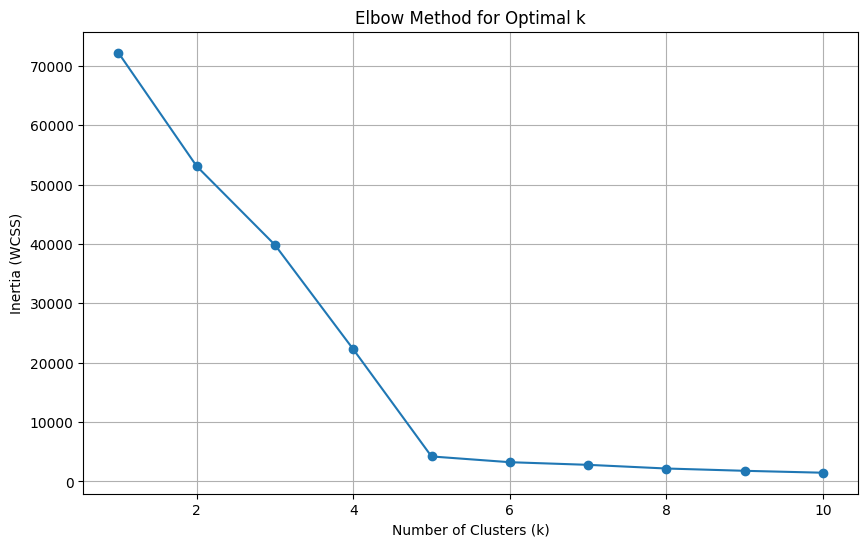

In [ ]:
# --- 5. K-Means Clustering ---

#Create a copy for K-Means
df_kmeans = df.copy()

# Data Preparation and Feature Engineering
def bin_hour_four_periods(hour):
    """Bins the transaction hour into four periods."""
    if 22 <= hour <= 23 or 0 <= hour <= 3:
        return 'late_night'
    elif 4 <= hour <= 11:
        return 'morning'
    elif 12 <= hour <= 17:
        return 'afternoon'
    elif 18 <= hour <= 21:
        return 'evening'
    else:
        return 'unknown'

df_kmeans['time_of_day'] = df_kmeans['transaction_hour'].apply(bin_hour_four_periods)

# One-Hot Encoding
df_encoded = pd.get_dummies(df_kmeans, columns=['time_of_day'], prefix='time')

# Feature Selection and Scaling
k_means_features = df_encoded[['amt'] + [col for col in df_encoded.columns if 'time_' in col]]
scaler = StandardScaler()
k_means_features_scaled = scaler.fit_transform(k_means_features)

# Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(k_means_features_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.grid()
plt.show()

Best parameters: {'tol': 1e-06, 'n_init': 10, 'n_clusters': 5, 'max_iter': 700, 'init': 'random'}
   cluster  fraud_probability
0        0           0.226080
1        1           0.931223
2        2           0.013141
3        3           0.009006
4        4           0.019482


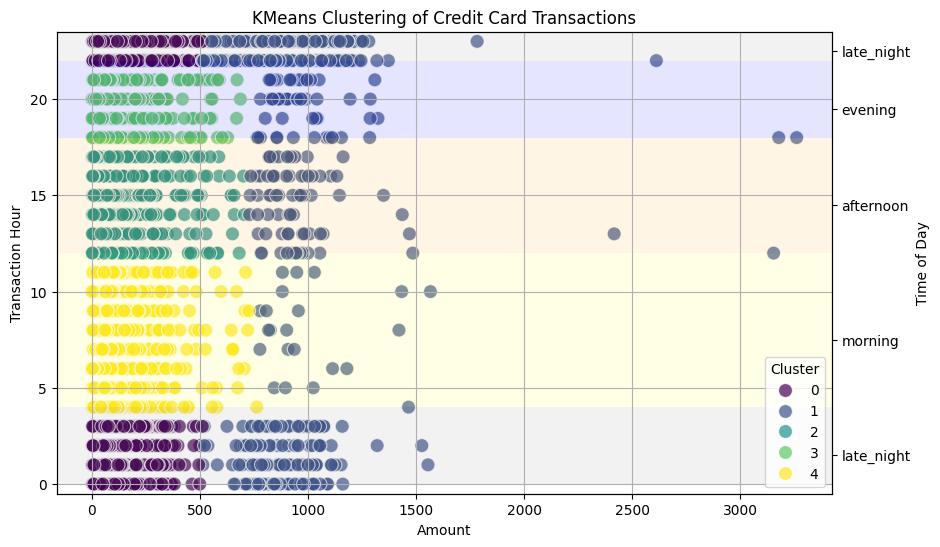

Silhouette Score: 0.8711676254491666
Davies-Bouldin Index: 0.3452790794025792


In [ ]:
# RandomizedSearchCV
param_distributions = {
    'n_clusters': range(4, 6), # Elbow Method showed optimal K around 5
    'init': ['k-means++', 'random'],
    'max_iter': [300, 500, 700, 1000, 1200],
    'n_init': [10, 20, 30, 50, 60, 70],
    'tol': [1e-4, 1e-5, 1e-6]
}

random_search = RandomizedSearchCV(
    KMeans(random_state=42),
    param_distributions,
    n_iter=20,
    cv=5,
    n_jobs=-1,
    random_state=42
)

random_search.fit(k_means_features_scaled)
best_params = random_search.best_params_
print("Best parameters:", best_params)

# Apply K-Means with Best Parameters
best_kmeans = KMeans(**best_params, random_state=42)
df_encoded['cluster'] = best_kmeans.fit_predict(k_means_features_scaled)

# Analysis and Visualization
df_kmeans = df_kmeans.merge(df_encoded[['cluster']], left_index=True, right_index=True)

fraud_probability = df_kmeans.groupby('cluster')['is_fraud'].mean().reset_index()
fraud_probability.columns = ['cluster', 'fraud_probability']
print(fraud_probability)

# Create the scatter plot with Seaborn
plt.figure(figsize=(10, 6))
ax1 = sns.scatterplot(data=df_kmeans, x='amt', y='transaction_hour', hue='cluster', palette='viridis', s=100, alpha=0.7)

# Set labels and title
plt.title('KMeans Clustering of Credit Card Transactions')
plt.xlabel('Amount')
plt.ylabel('Transaction Hour')
plt.legend(title='Cluster')
plt.grid()

# Define the time periods and their corresponding y-ranges and colors
time_periods = {
    'late_night': [(22, 24), (0, 4)],
    'morning': [(4, 12)],
    'afternoon': [(12, 18)],
    'evening': [(18, 22)]
}
colors = {'late_night': 'gray', 'morning': 'yellow', 'afternoon': 'orange', 'evening': 'blue'}
alpha = 0.1

for period, ranges in time_periods.items():
    for y_min, y_max in ranges:
        rect = patches.Rectangle((ax1.get_xlim()[0], y_min),  # Bottom-left corner
                                 ax1.get_xlim()[1] - ax1.get_xlim()[0],  # Width
                                 y_max - y_min,  # Height
                                 facecolor=colors[period],
                                 alpha=alpha,
                                 edgecolor='none')  # No border
        ax1.add_patch(rect)

ax2 = ax1.twinx()

# Define the tick positions and labels *including* the duplicate late_night
tick_positions = [1.5, 7.5, 14.5, 19.5, 22.5]
time_period_labels = ['late_night', 'morning', 'afternoon', 'evening', 'late_night'] #add one label

ax2.set_yticks(tick_positions)
ax2.set_yticklabels(time_period_labels)
ax2.set_ylabel('Time of Day')

# Make sure the primary y-axis has the correct limits
ax1.set_ylim(-0.5, 23.5)
ax2.set_ylim(-0.5, 23.5) #add one more.


plt.show()

# Evaluation (remains the same
silhouette_avg = silhouette_score(k_means_features_scaled, df_encoded['cluster'])
davies_bouldin = davies_bouldin_score(k_means_features_scaled, df_encoded['cluster'])

print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", davies_bouldin)

## LSTM Model for Time Series Forecasting


The hyperparameter search is complete. The optimal number of units in the first LSTM layer is 96,
the optimal learning rate is 0.01, and the optimal number of units in the Dense layer is 25.

Epoch 1/50
17/17 - 7s - 387ms/step - loss: 0.0704 - mae: 0.1735 - mse: 0.0704 - val_loss: 0.0173 - val_mae: 0.0986 - val_mse: 0.0173 - learning_rate: 0.0100
Epoch 2/50
17/17 - 2s - 104ms/step - loss: 0.0180 - mae: 0.1021 - mse: 0.0180 - val_loss: 0.0051 - val_mae: 0.0596 - val_mse: 0.0051 - learning_rate: 0.0100
Epoch 3/50
17/17 - 1s - 80ms/step - loss: 0.0084 - mae: 0.0723 - mse: 0.0084 - val_loss: 0.0039 - val_mae: 0.0504 - val_mse: 0.0039 - learning_rate: 0.0100
Epoch 4/50
17/17 - 2s - 147ms/step - loss: 0.0060 - mae: 0.0591 - mse: 0.0060 - val_loss: 0.0043 - val_mae: 0.0537 - val_mse: 0.0043 - learning_rate: 0.0100
Epoch 5/50
17/17 - 1s - 77ms/step - loss: 0.0056 - mae: 0.0593 - mse: 0.0056 - val_loss: 0.0065 - val_mae: 0.0599 - val_mse: 0.0065 - learning_rate: 0.0100
Epoch 6/50
17/17 - 3s - 

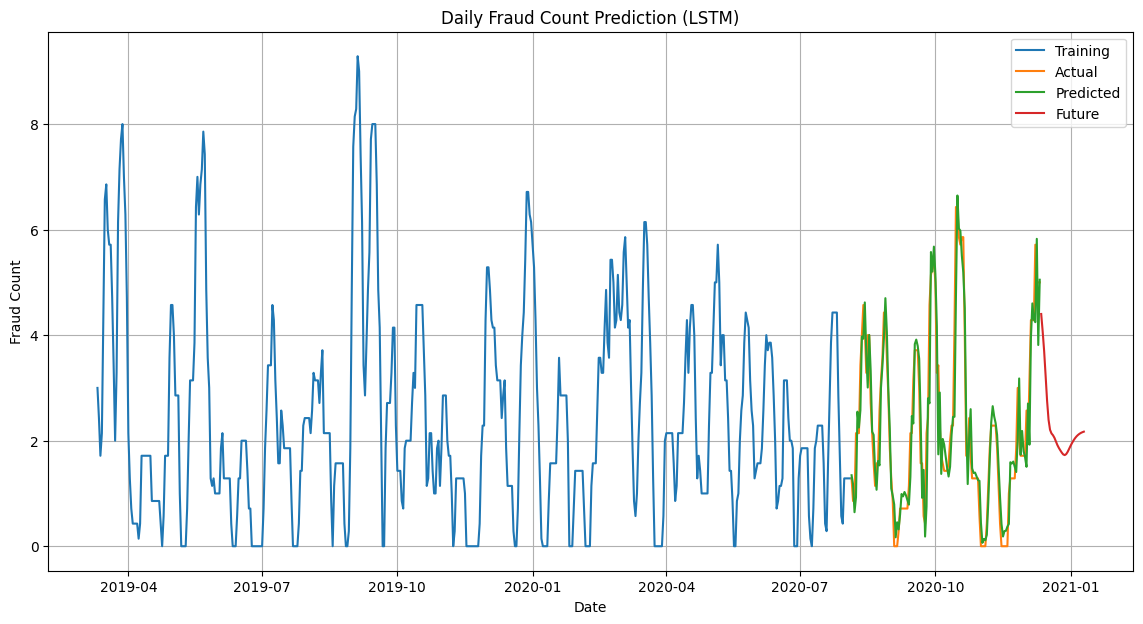

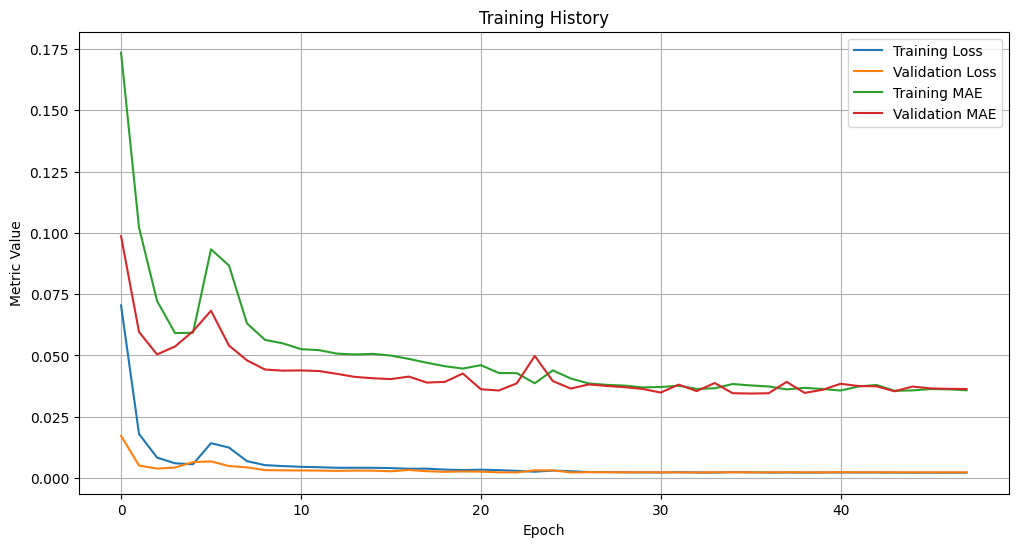

In [ ]:
# --- 6. LSTM Model for Time Series Forecasting ---

#Create a copy for LSTM
df_lstm = df.copy()

# Data Preparation and Preprocessing
df_lstm['trans_date'] = pd.to_datetime(df_lstm['trans_date'])
df_lstm.sort_values(by='trans_date', inplace=True)
df_lstm.set_index('trans_date', inplace=True)

daily_fraud_count = df_lstm[df_lstm['is_fraud'] == 1].resample('D')['is_fraud'].count().reset_index()
daily_fraud_count.columns = ['trans_date', 'fraud_count']
daily_fraud_count = daily_fraud_count.set_index('trans_date').resample('D').asfreq()
daily_fraud_count['fraud_count'] = daily_fraud_count['fraud_count'].interpolate(method='linear').clip(0).round().astype(int)

daily_fraud_count['MA7'] = daily_fraud_count['fraud_count'].rolling(window=7).mean()
daily_fraud_count.dropna(inplace=True)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_fraud_count['MA7'].values.reshape(-1, 1))

# Create LSTM Model's Dataset
def create_dataset(data, n_steps=60):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

n_steps = 60
X, y = create_dataset(scaled_data, n_steps)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Train/Test Split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build and Train LSTM Model (with Keras Tuner)

def build_model(hp):
    model = Sequential()
    units = hp.Int('units', min_value=32, max_value=128, step=32)
    model.add(LSTM(units, return_sequences=True, input_shape=(n_steps, 1)))
    model.add(LSTM(units))
    hp_dense_units = hp.Choice('dense_units', values=[16, 25, 32])
    model.add(Dense(hp_dense_units))
    model.add(Dense(1))
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    optimizer = Adam(learning_rate=hp_learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', 'mse'])
    return model

# Keras Tuner Setup
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='fraud_detection_tuning',
    overwrite=True
)

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
    ModelCheckpoint('best_lstm_model_manual.keras', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)
]

# Hyperparameter Search
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=callbacks, verbose=0)

# Get Best Hyperparameters and Model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.get_best_models(num_models=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first LSTM layer is {best_hps.get('units')},
the optimal learning rate is {best_hps.get('learning_rate')}, and the optimal number of units in the Dense layer is {best_hps.get('dense_units')}.
""")

# Retrain on the ENTIRE Training Set

best_model = build_model(best_hps)
history = best_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=callbacks, verbose=2)

# Evaluate Model

y_pred = best_model.predict(X_test, verbose=0)
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

mse = mean_squared_error(y_test_actual, y_pred_actual)
mae = mean_absolute_error(y_test_actual, y_pred_actual)
r2 = r2_score(y_test_actual, y_pred_actual)

print(f"Test MSE: {mse}")
print(f"Test MAE: {mae}")
print(f"Test R-squared: {r2}")


# Make Future Predictions

last_n_days = scaled_data[-n_steps:]
future_predictions = []

for _ in range(30):
    prediction = best_model.predict(last_n_days.reshape(1, n_steps, 1), verbose=0)
    future_predictions.append(prediction[0, 0])
    last_n_days = np.append(last_n_days[1:], prediction)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Visualize Results

train_dates = daily_fraud_count.index[n_steps:train_size + n_steps]
test_dates = daily_fraud_count.index[train_size + n_steps:]
future_dates = pd.date_range(test_dates[-1] + pd.Timedelta(days=1), periods=30)
predictions = y_pred_actual

plt.figure(figsize=(14, 7))
plt.plot(train_dates, scaler.inverse_transform(y_train.reshape(-1,1)), label='Training')
plt.plot(test_dates, y_test_actual, label='Actual')
plt.plot(test_dates, predictions, label='Predicted')
plt.plot(future_dates, future_predictions, label='Future')
plt.title('Daily Fraud Count Prediction (LSTM)')
plt.xlabel('Date')
plt.ylabel('Fraud Count')
plt.legend()
plt.grid(True)
plt.show()

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('Training History')
plt.legend()
plt.grid(True)
plt.show()

## NLP spaCy for analysis of Merchants with high fraud ratio

In [ ]:
# --- 7. NLP spaCy for analysis of Merchants with high fraud ratio ---

# Load spaCy bult-in "en_core_web_sm" model
nlp = spacy.load("en_core_web_sm")

# Merchant Standardization
def standardize_merchant(text, matcher):
    if isinstance(text, str):
        doc = nlp(text.lower())
        matches = matcher(doc)
        if matches:
            _, start, end = matches[0]
            return doc[start:end].text
    return text

# Pre-compile patterns
if 'merchant' in df.columns:
    known_merchants = {merchant.lower() for merchant in df['merchant'].dropna().astype(str)}
    patterns = [nlp.make_doc(name) for name in known_merchants]
    matcher = PhraseMatcher(nlp.vocab, attr="LOWER")
    matcher.add("KNOWN_MERCHANTS", patterns)

    # Apply standardization *only* if the 'merchant' column exists
    df['merchant_standardized'] = df['merchant'].apply(lambda x: standardize_merchant(x, matcher))

else:
    # Handle the case where 'merchant' column is missing
    print("Warning: 'merchant' column not found. Skipping merchant standardization.")
    df['merchant_standardized'] = df['merchant']  # Or some other appropriate fallback

# Fraud Statistics Calculation
if 'merchant_standardized' in df.columns and 'is_fraud' in df.columns:
    merchant_stats = df.groupby('merchant_standardized', observed=True)['is_fraud'].agg(['count', 'mean']).reset_index()
    merchant_stats.columns = ['merchant', 'total_transactions', 'fraud_ratio']
    merchant_stats_filtered = merchant_stats[merchant_stats['total_transactions'] >= 10].copy()
    merchant_stats_filtered['merchant'] = merchant_stats_filtered['merchant'].str.title()
    merchant_stats_filtered.sort_values(by='fraud_ratio', ascending=False, inplace=True)
else:
    merchant_stats_filtered= pd.DataFrame(columns=['merchant', 'total_transactions', 'fraud_ratio'])
    print("Warning: 'merchant_standardized' or 'is_fraud' column not found. Skipping fraud statistics calculation.")

# Chatbot
def chatbot(user_input):
    if not isinstance(user_input, str):
        return "Invalid input: Input must be a string."

    user_input = user_input.lower().strip()

    if user_input.startswith("top") and "highest fraud proportion merchants" in user_input:
        try:
            num = int(user_input.split()[1])  # More robust number extraction
            if num <= 0:
                raise ValueError
        except (ValueError, StopIteration):
            return "Invalid input format. Please enter: 'Top [number] highest fraud proportion Merchants' (number > 0)"

        top_merchants = merchant_stats_filtered.head(num)
        if top_merchants.empty: #check if is empty
            return f"No merchants found with at least 10 transactions. Cannot display top {num}."

        formatted_response = "\n".join(
            f"**{row['merchant']}** with fraud ratio: **{row['fraud_ratio']:.2f}**"
            for _, row in top_merchants.iterrows()
        )
        return f"Here are the top {num} merchants (total_transactions >= 10) with the highest fraud ratios:\n\n{formatted_response}"

    return "I'm sorry, I don't quite understand your question. Could you rephrase it?"

# Gradio Interface
with gr.Blocks() as demo:
    gr.Markdown("### 🤖 Fraud Detection Chatbot")
    chatbot_ui = gr.Chatbot(label="Chat History", elem_id="chatbot")
    user_input = gr.Textbox(label="Enter your question", placeholder="e.g., Top 10 highest fraud proportion Merchants")
    send_button = gr.Button("SEND")

    def chat_interface(user_input, chat_history=[]):
        response = chatbot(user_input)
        chat_history.append(("User001", user_input))
        chat_history.append(("ChatBot", response))
        return chat_history

    send_button.click(chat_interface, inputs=[user_input, chatbot_ui], outputs=chatbot_ui)

demo.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1c8d4e559d0837f20f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


#Data Analytic Research Project Results

## 1. EDA Results:

The analysis identified key characteristics of fraudulent transactions across various dimensions, including City, Age, Transaction Hour, Job, merchant Categories, transaction Amounts, and City Populations. These findings help pinpoint features associated with high-risk transactions, enabling optimized resource allocation for monitoring and enhanced targeted prevention measures for refined risk control.

**City Distribution:** Credit card fraud is relatively concentrated in certain areas of the U.S. West Coast.
<br>

**Age Distribution:** The fraud rate increases with age, becoming particularly pronounced after 70, maintaining high levels between 80 and 90 years old. The age group of 20-27 also shows a relatively high fraud rate
<br>

**Transaction Hour Distribution:** Fraud rates are lower between 4 AM and 9 PM but rise sharply during late night/early morning hours (10 PM – 3 AM), peaking around midnight
<br>

**Job Distribution:** There are significant differences in fraud rates across various occupations, with some nearing 100% and others being very low
<br>

**Merchant Categories Distribution:** Certain merchant categories exhibit noticeably higher fraud rates than others
<br>

**Transaction Amount and City Population:** Fraudulent transactions tend to be concentrated in lower transaction amounts and smaller city populations
<br>

---

## 2. ML Models Results

These 2 models provide in-depth insights into fraud detection and create an effective fraud detection tool that surpasses traditional rule-based systems, offering higher accuracy, adaptability, and practicality.

### 2.1 RFC

The RF model performs exceptionally well in the fraud detection task, achieving high ROC AUC and accuracy values, indicating its effectiveness in distinguishing between fraudulent and non-fraudulent transactions. This meets the project’s goal of “high-precision fraud detection.” The recall rate (0.97) is a critical metric for fraud detection, demonstrating that the model successfully identifies most fraudulent transactions, minimizing false negatives and reducing losses for both banks and users.
<br>

**Table: Evaluation Metrics**

| Class        | Precision | Recall | F1-Score | Support |
|--------------|-----------|--------|----------|---------|
| 0            | 0.99      | 0.98   | 0.98     | 2520    |
| 1            | 0.85      | 0.94   | 0.89     | 369     |
| **Accuracy** |           |        |          | **0.97**|
| Macro Avg    | 0.92      | 0.96   | 0.94     | 2889    |
| Weighted Avg | 0.97      | 0.97   | 0.97     | 2889    |
<br>

**ROC AUC: 0.9909**
<br>
Feature importance analysis reveals that transaction amount (amt) is the most significant feature, followed closely by transaction hour (transaction_hour). Other important features include category (category), age (age), city population (city_pop), and occupation (job). This analysis highlights the key factors influencing fraud occurrence, aligning with the project’s goal of “identifying key factors related to fraudulent activity.” This understanding helps banks comprehend the underlying mechanisms of fraud, enabling them to develop more effective risk control strategies
<br>

### 2.2 K-Means

The K-Means clustering model successfully identified distinct groups of transactions with significantly varying fraud probabilities. By combining transaction amount (`amt`) with engineered features representing the time of day (`late_night`, `morning`, `afternoon`, `evening`), the model uncovered patterns not readily apparent through traditional rule-based methods. The Elbow Method suggested a `k` value around 5, and this was further refined using `RandomizedSearchCV` to optimize hyperparameters.  The resulting clusters showed excellent separation and cohesion (Silhouette Score: 0.871, Davies-Bouldin Index: 0.345).  Crucially, Cluster 1 demonstrated a very high fraud probability (0.931) and was characterized by transactions occurring during the "late_night" period (10 PM - 3:59 AM) with amounts generally between 500 and 1200. This unsupervised approach provides valuable insights for targeted fraud prevention.
<br>

**Table: Clusters with Fraud Probability and Characteristics:**

| Cluster | Fraud Probability | Characteristics                                                                                                                      |
| :-----: | :----------------: | :----------------------------------------------------------------------------------------------------------------------------------- |
|    0    |       0.226        | Elevated fraud probability and amount generally less than around 500.                                                                                                       |
|    1    |       0.931        | **Very High fraud probability**; highly likely fraudulent; transactions primarily during "late_night" hours and transaction amount mainly between around 500 and 1200. |
|    2    |       0.013        | Low fraud probability; typical, legitimate transactions.                                                                           |
|    3    |       0.009        | Low fraud probability; typical, legitimate transactions.                                                                           |
|    4    |       0.019        | Low fraud probability; typical, legitimate transactions.                                                                           |

<br>

---

## 3. DL Models LSTM Results

The LSTM model performs well, with low MSE and MAE values and an R² score close to 1, indicating a high level of fit to the data. Meanwhile, LSTM Training and Validation Loss/MAE Curves demonstrates the LSTM model's excellent performance during training, with both training and validation loss, as well as Mean Absolute Error (MAE), significantly decreasing and stabilizing. This indicates effective learning and strong generalization ability without overfitting.
<br>

**Table LSTM Evaluation Metrics**


| Metric | Value   |
|--------|---------|
| MSE    | 0.345  |
| MAE    | 0.436  |
| R²     | 0.873  |

The predicted trend of daily fraud numbers closely aligns with the actual trend. Training history shows that both training loss and validation loss steadily decrease and stabilize. This suggests that the LSTM model can accurately predict future fraud trends, achieving the project’s goal of predicting future fraud trends to support proactive risk management decisions. This enables banks to issue early warnings and take preventive measures to reduce potential losses

---

## 4. NLP Result

**Merchant Analysis (NLP - spaCy):**  The project utilized spaCy's `en_core_web_sm` model and `PhraseMatcher` to standardize merchant names, correcting for variations in spelling and capitalization.  This preprocessing step allowed for accurate aggregation of transaction data by merchant.  A chatbot interface was implemented, enabling users to query for the top N merchants with the highest fraud ratios (considering only merchants with a minimum number of transactions).  This interactive feature provides a user-friendly way to access key insights from the merchant analysis.  For example, a user can ask "Top 10 highest fraud proportion Merchants", and the chatbot will return a formatted list of the top 10 merchants and their associated fraud ratios.

<br>

---

## Conclusion

This project successfully established a credit card fraud detection system by integrating machine learning (RFC & K-Means), deep learning (LSTM), and NLP (spaCy) techniques, along with thorough EDA, visualizations, and an interactive tool & chatbot.  The project provides deep insights into fraudulent transaction patterns.  Overall, this project delivers a robust and practical fraud detection and prediction tool, exceeding the limitations of traditional rule-based systems. The combination of supervised (RFC), unsupervised (K-Means), time series (LSTM) and text analysis (spaCy) provides a multi-faceted approach to fraud detection.

*   **Data Understanding:** EDA, including visualizations with Plotly, uncovered key fraud characteristics across multiple dimensions (city, age, transaction hour, job, merchant category, amount, and city population).
*   **Model Development:** The Random Forest Classifier (RFC) achieved excellent classification performance, accurately distinguishing between fraudulent and legitimate transactions. K-Means clustering, enhanced by time-period binning and hyperparameter optimization, revealed distinct transaction groups with significantly different fraud probabilities. The identification of a high-risk cluster associated with late-night, lower-amount transactions provides actionable insights for targeted risk management. The LSTM model demonstrated strong performance in predicting future trends in daily fraud counts.
*   **Technical Innovation:** The project incorporated several advanced techniques:
    *   NLP (spaCy) for merchant name standardization.
    *   Class balancing (SMOTE) to address the imbalanced dataset in the Random Forest model.
    *   Feature engineering (creating the `time_of_day` feature).
    *   Hyperparameter optimization for both K-Means and Random Forest.
*   **Practical Application:**  The Gradio-based chatbot provides a user-friendly interface for querying the results of the merchant analysis, making the insights readily accessible. The combination of models and the interactive tool provide a practical and powerful system for fraud prevention and risk management.